<a href="https://colab.research.google.com/github/soph-loaf/aht_project/blob/main/ReadingDataFromWundergound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sophia Ladyzhets, sal2213

Partner: Sally Green

## Reading Data from Wunderground

### Objective:

Scrape data from Weather Underground webpages and make scatterplots of temperature readings taken at different weather stations over defined time intervals.

In [131]:
import requests
import pandas as pd
import numpy as np
import math

In [132]:
url = 'https://www.wunderground.com/dashboard/pws/KILDALTO3/table/2018-06-01/2018-06-01/daily'

In [133]:
#get the url from rweather
rweather = requests.get(url)

#read the content from the website into an html
html = rweather.content

#read the content from the html into a pandas dataframe
htmldf = pd.read_html(html)

#print the dataframe
# htmldf[-1]

In [134]:
# start_date = '2018-06-01'
start_date = '2018-10-24'
# end_data = '2021-09-30'
end_date = '2018-10-27'
station = 'KILDALTO3'
station = 'KILWELDO6' # Only data from June 1, 2021. Otherwise trying from 2018 June 1.
station = 'KILMOUNT18'

#note: something went wrong on 2018-10-28, trying range from 2018-10-24 to 2018-10-27
date_range = pd.date_range(start=start_date, end=end_date)
weatherdata = pd.DataFrame()

try:
    for dates in date_range:
        #print(str(dates.date()))
        url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'
        #print(url)

        rweather = requests.get(url)
        html = rweather.content
        htmldf = pd.read_html(html)
        wdata = htmldf[-1]
        wdata['Date'] = dates.date() 
        weatherdata = weatherdata.append(wdata)
    
except:
    print('something went wrong on ' + str(dates.date()))

weatherdata.dropna(thresh=5)
weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

In [135]:
weatherdata

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-24
1,12:04 AM,42.8 °F,15.1 °F,32 °%,NE,0.0 °mph,0.3 °mph,30.56 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-24
2,12:09 AM,42.3 °F,14.2 °F,32 °%,NE,0.7 °mph,1.8 °mph,30.56 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-24
3,12:14 AM,41.8 °F,14.2 °F,32 °%,East,0.0 °mph,0.0 °mph,30.55 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-24
4,12:19 AM,41.3 °F,14.5 °F,33 °%,SE,0.0 °mph,0.0 °mph,30.56 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,11:39 PM,45.6 °F,33.1 °F,61 °%,SSE,0.0 °mph,0.0 °mph,30.13 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-27
285,11:44 PM,45.7 °F,33.4 °F,62 °%,SSE,0.0 °mph,0.1 °mph,30.13 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-27
286,11:49 PM,45.7 °F,33.8 °F,63 °%,SSE,0.0 °mph,0.0 °mph,30.12 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-27
287,11:54 PM,45.7 °F,34.2 °F,64 °%,SSE,0.0 °mph,0.3 °mph,30.12 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2018-10-27


In [140]:
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

#dates processing:

dates = list(weatherdata['Date'])
# dates1 = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]
# [datetime.strptime(d, "%m/%d/%Y").date() for d in dates1]
time = weatherdata['Time']
temp = list(weatherdata['Temperature'])


#temperature processing:

#setting nan values to zero and converting strings to floats
for i in range(len(temp)):
    if type(temp[i]) == str:
        temp[i] = temp[i][:-3]
    elif math.isnan(temp[i]) == True:
        temp[i] = 0
    else:
        temp[i] = temp[i]

for j in range(len(temp)):
    temp[j] = float(temp[j])

x = dates
y = temp


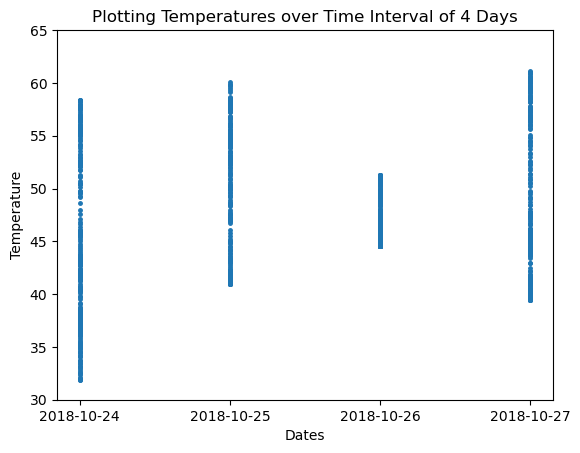

In [141]:
#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x, y, 'o', markersize=2.5)
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 65.0])
ax.set_title('Plotting Temperatures over Time Interval of 4 Days')
plt.show()
